**DataSet Diabets**

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

## Bibliotecas

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 8)

## Parte 1: Preparação e Manipulação dos Dados

In [65]:
# Carregar o dataset
url = 'https://raw.githubusercontent.com/Welington156/Diabets/refs/heads/main/diabetes.csv'
# Leia o CSV diretamente do GitHub
df = pd.read_csv(url)
print("Cabeçalho do Dataset:")
df.head()

Cabeçalho do Dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
# Informações e estatísticas
print("\nInformações do Dataset:")
df.info()
print("\nEstatísticas Descritivas:")
df.describe()


Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Estatísticas Descritivas:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [67]:
# Verificar valores faltantes
print("\nValores Faltantes em Cada Coluna:")
df.isnull().sum()


Valores Faltantes em Cada Coluna:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [68]:
# Filtragem: Selecionar pacientes diagnosticados com diabetes (Outcome = 1)
diabetic_df = df[df['Outcome'] == 1]
print("\n== Exemplo: Pacientes com Diabetes ==")
diabetic_df.head()


== Exemplo: Pacientes com Diabetes ==


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [69]:
# Agregação: Média dos atributos por Outcome
mean_by_outcome = df.groupby('Outcome').mean()
print("\n== Média dos atributos por Outcome ==")
mean_by_outcome


== Média dos atributos por Outcome ==


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [70]:
# Seleção: Escolher colunas específicas (ex.: Glucose, BMI e Age)
selected_columns = df[['Glucose', 'BMI', 'Age']]
print("\n== Seleção: Colunas Glucose, BMI e Age ==")
print(selected_columns.head())


== Seleção: Colunas Glucose, BMI e Age ==
   Glucose   BMI  Age
0      148  33.6   50
1       85  26.6   31
2      183  23.3   32
3       89  28.1   21
4      137  43.1   33


In [71]:
print("\nContagem de pacientes com e sem diabetes (Outcome):")
print(df['Outcome'].value_counts())


Contagem de pacientes com e sem diabetes (Outcome):
Outcome
0    500
1    268
Name: count, dtype: int64


## Parte 2: Visualização dos Dados

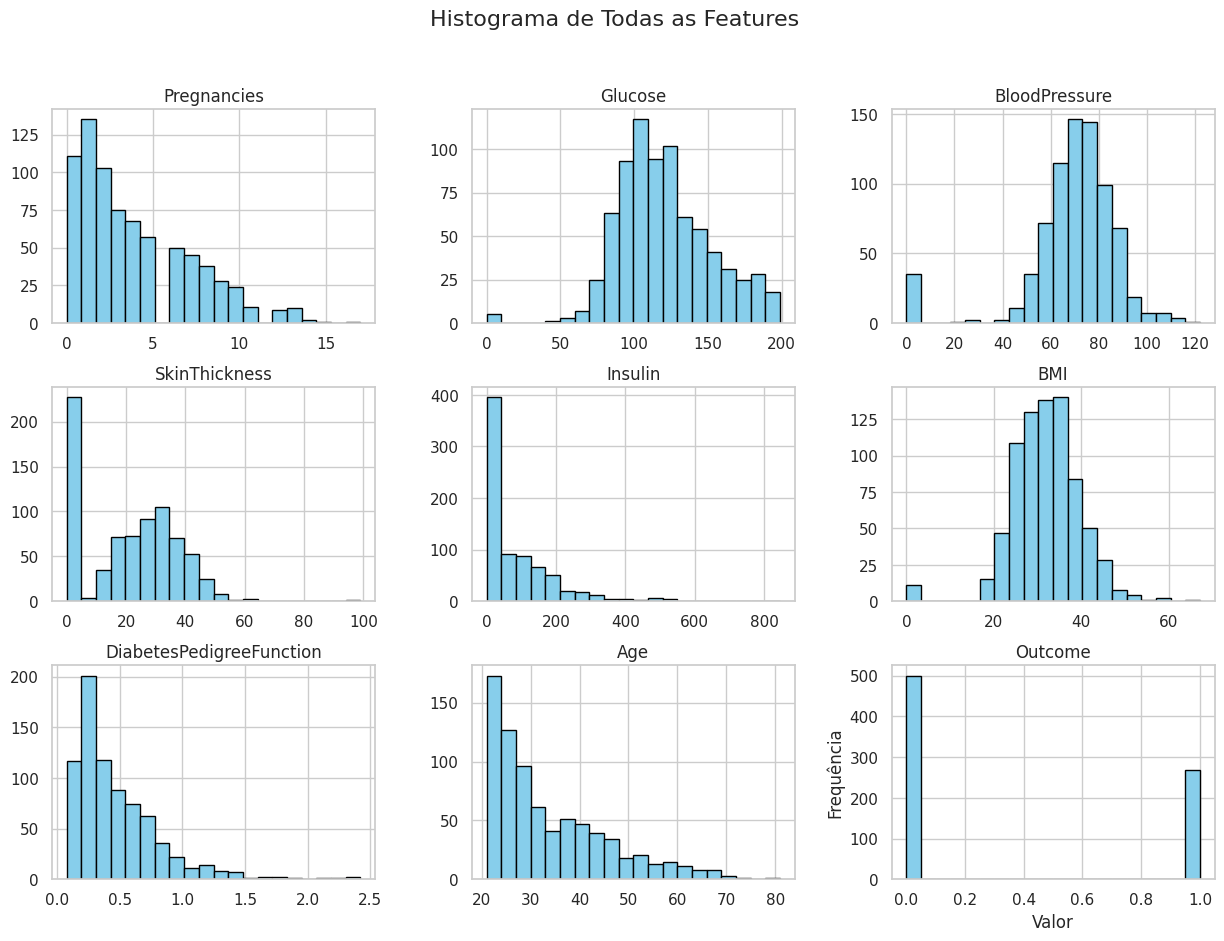

In [72]:
## 1. Histogramas para todas as variáveis
df.hist(bins=20, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("Histograma de Todas as Features", fontsize=16)
plt.xlabel("Valor", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.show()

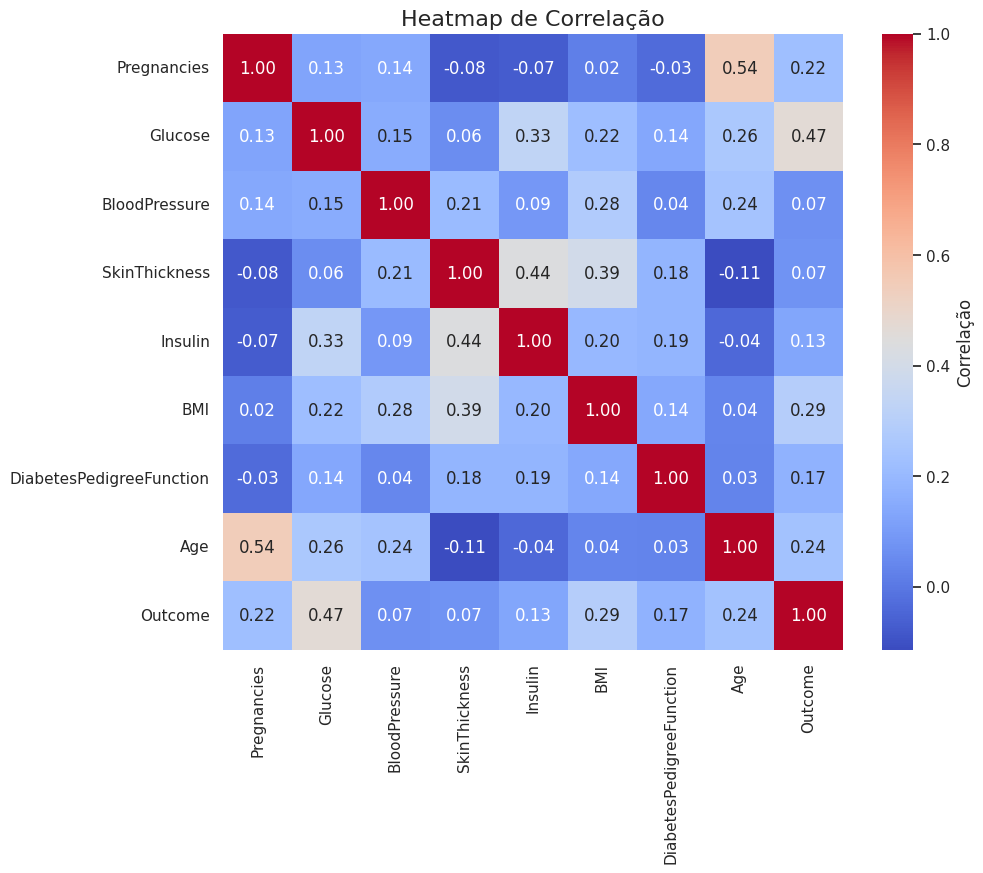

In [73]:
## 2. Heatmap de Correlação
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlação'})
plt.title("Heatmap de Correlação", fontsize=16)
plt.show()

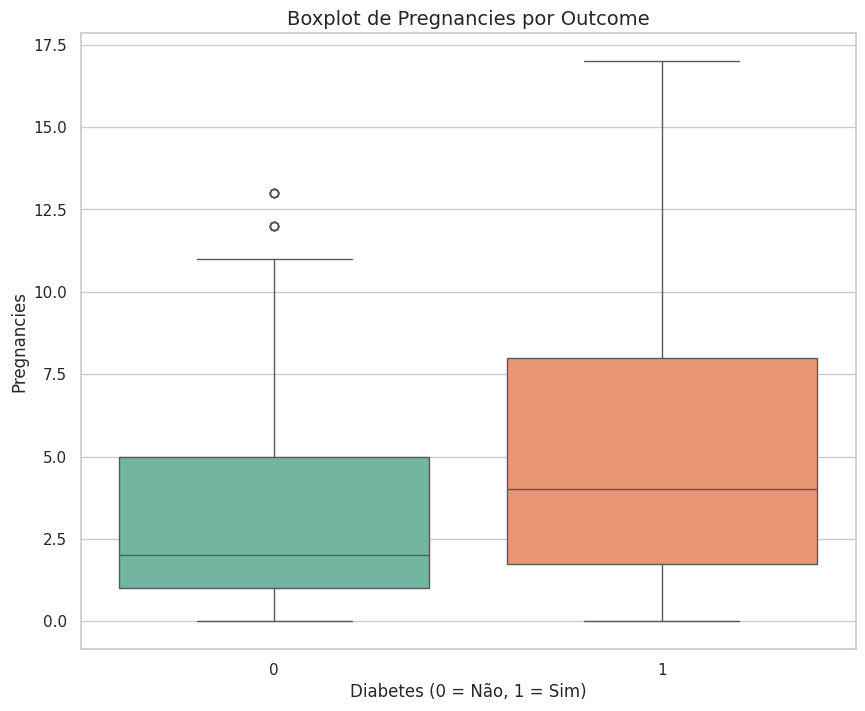

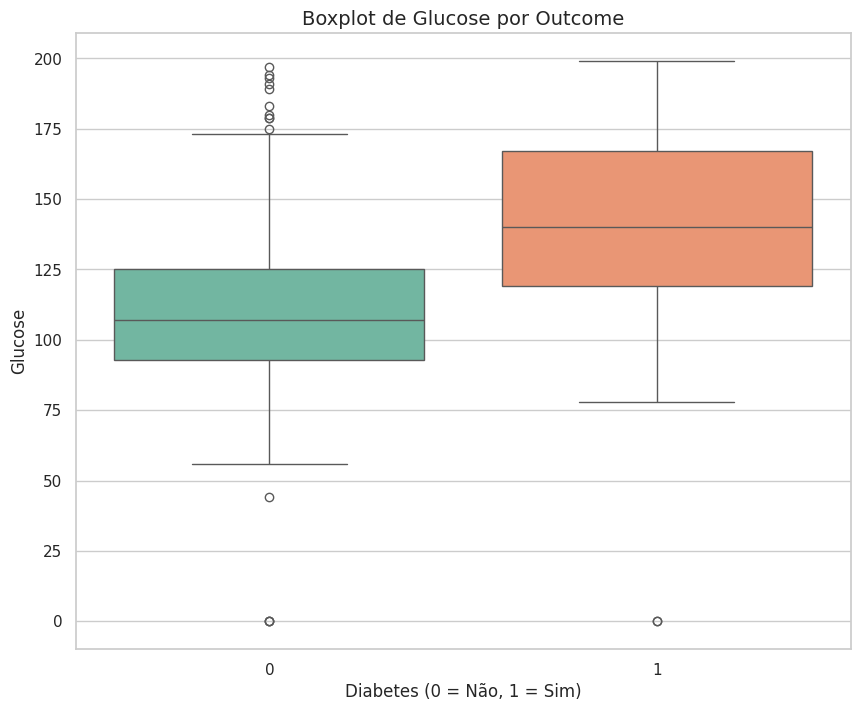

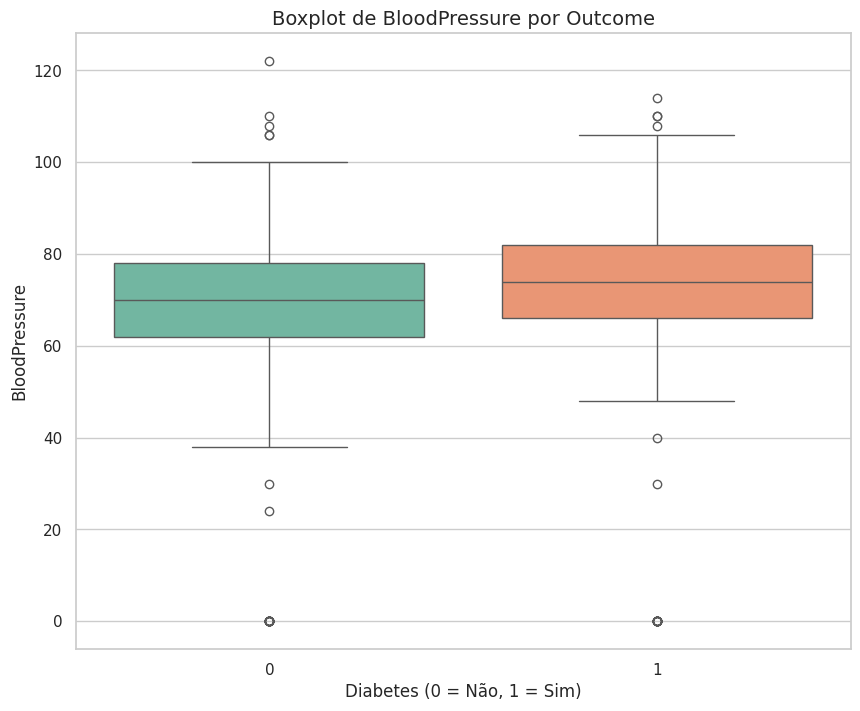

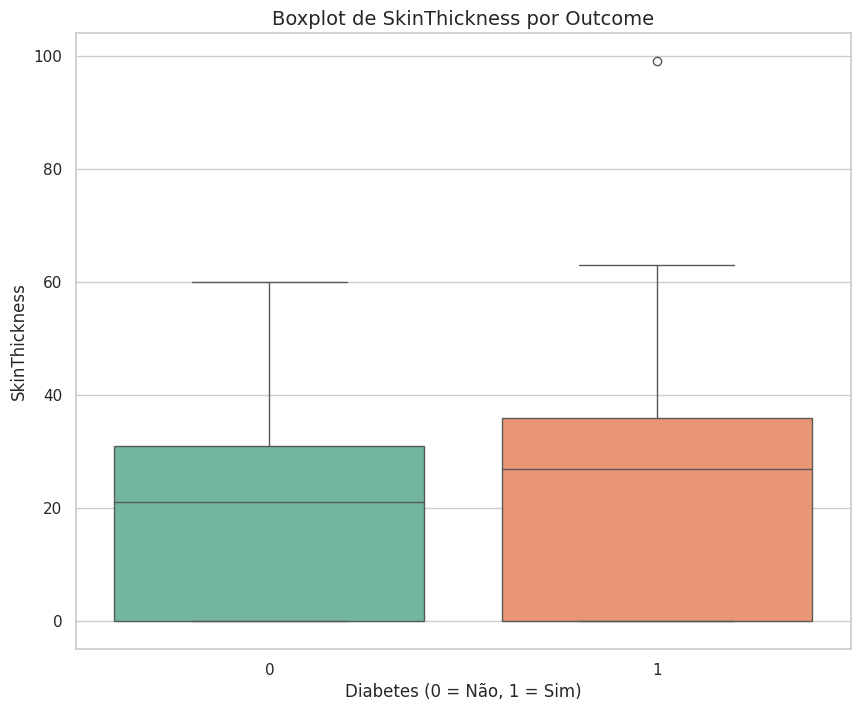

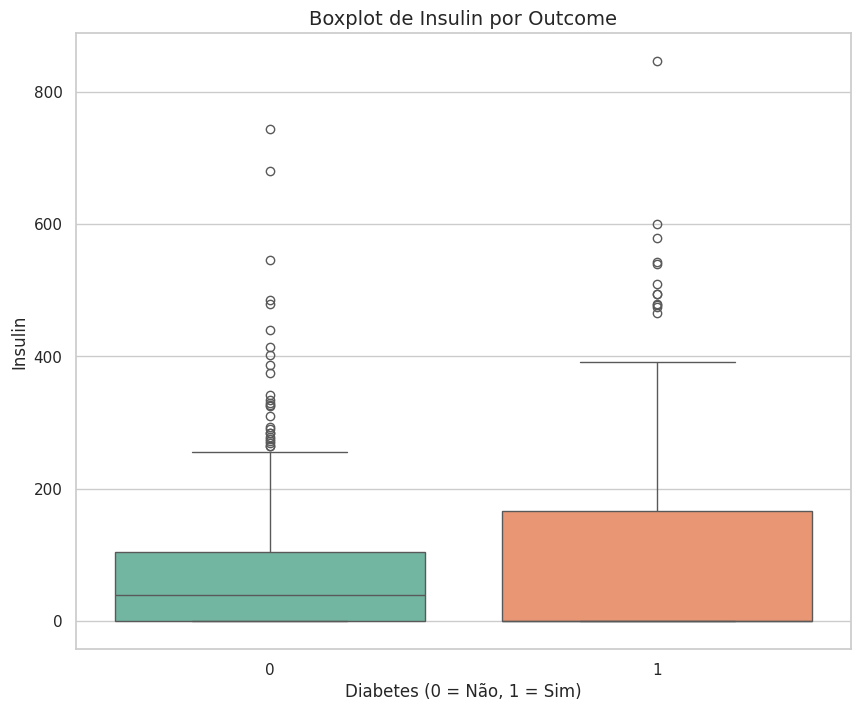

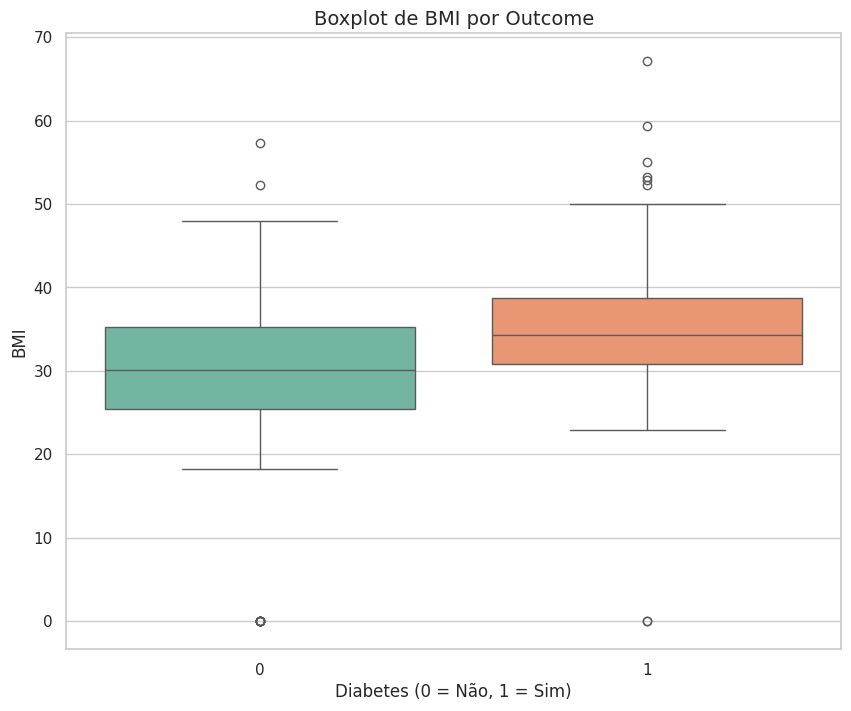

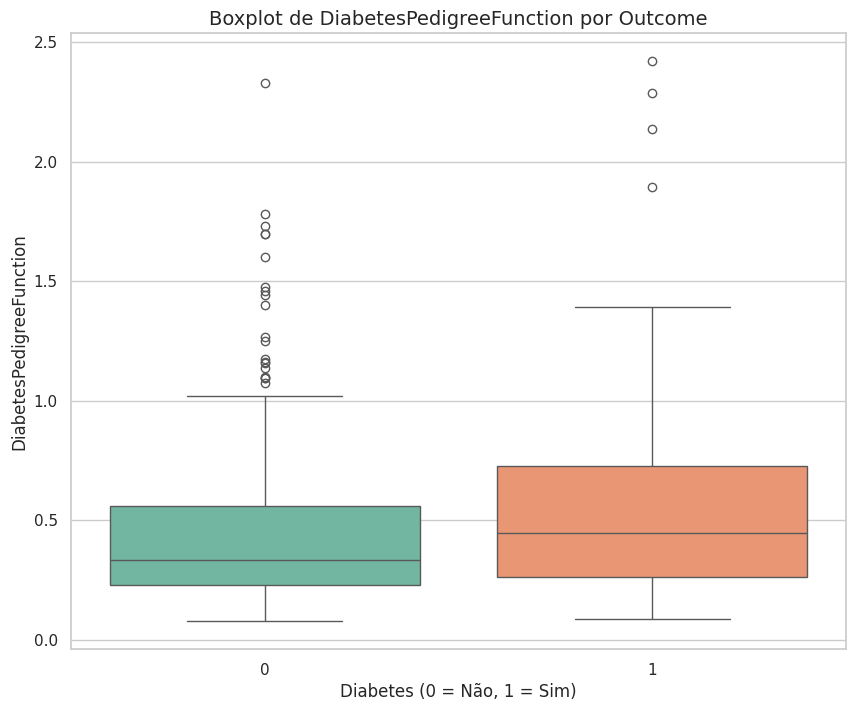

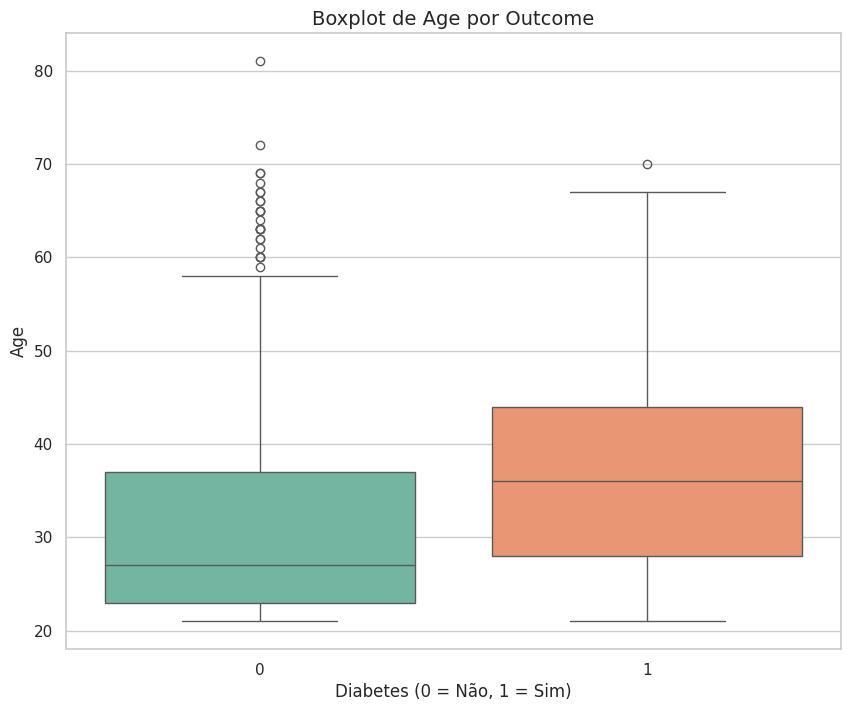

In [74]:
## 4. Boxplots para cada feature por Outcome
features = df.columns[:-1]
for feature in features:
    plt.figure()
    sns.boxplot(x="Outcome", y=feature, data=df, palette="Set2")
    plt.title(f"Boxplot de {feature} por Outcome", fontsize=14)
    plt.xlabel("Diabetes (0 = Não, 1 = Sim)", fontsize=12)
    plt.ylabel(f"{feature}", fontsize=12)
    plt.show()

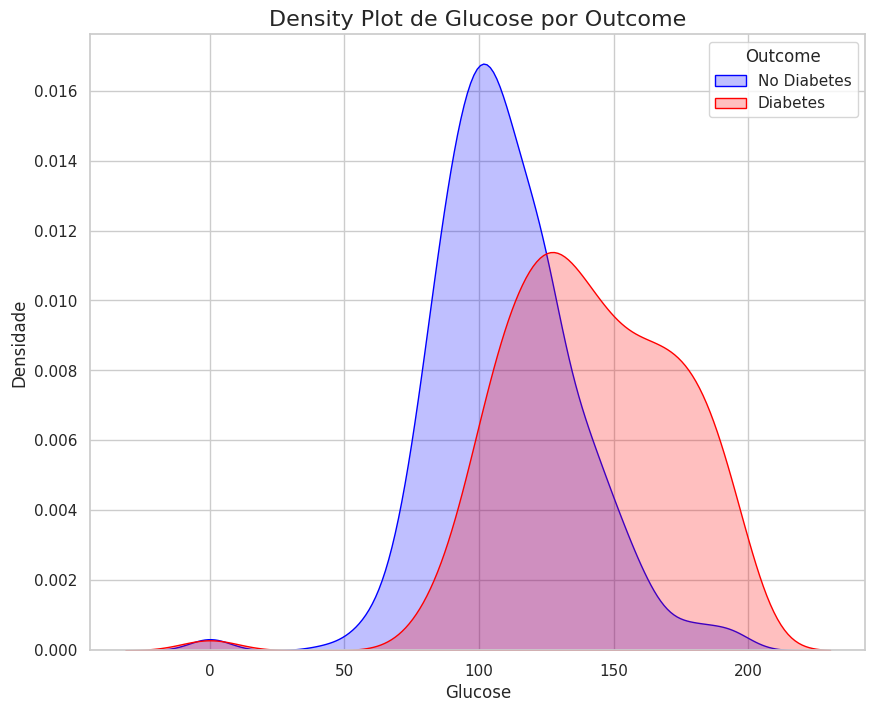

In [75]:
## 5. Density Plot para Glucose por Outcome
plt.figure()
sns.kdeplot(df.loc[df.Outcome==0, "Glucose"], shade=True, label="No Diabetes", color='blue')
sns.kdeplot(df.loc[df.Outcome==1, "Glucose"], shade=True, label="Diabetes", color='red')
plt.title("Density Plot de Glucose por Outcome", fontsize=16)
plt.xlabel("Glucose", fontsize=12)
plt.ylabel("Densidade", fontsize=12)
plt.legend(title="Outcome", labels=["No Diabetes", "Diabetes"])
plt.show()

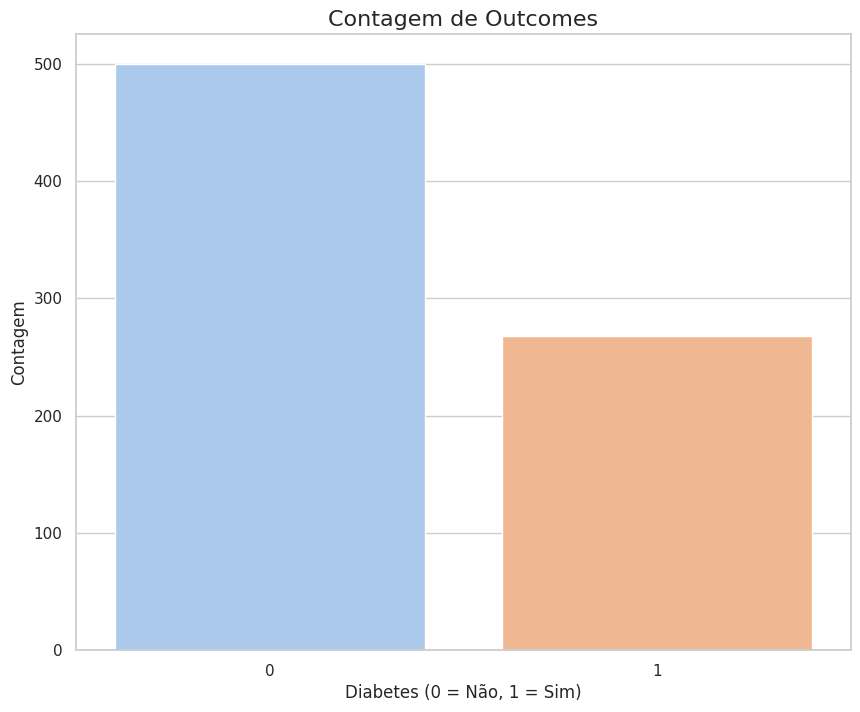

In [76]:
## 7. Count Plot de Outcome
plt.figure()
sns.countplot(x="Outcome", data=df, palette="pastel")
plt.title("Contagem de Outcomes", fontsize=16)
plt.xlabel("Diabetes (0 = Não, 1 = Sim)", fontsize=12)
plt.ylabel("Contagem", fontsize=12)
plt.show()

## Parte 3: Predição de Classes com KNN

Acurácia do modelo: 0.7013


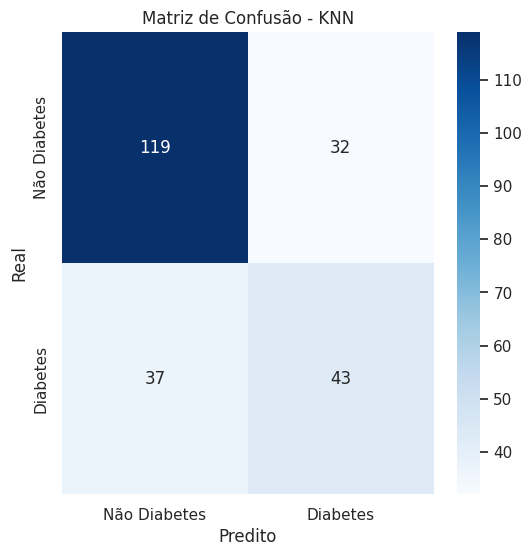

Matriz de Confusão:
[[119  32]
 [ 37  43]]


In [77]:
# Dividindo em variáveis independentes (X) e dependente (y)
X = df.drop(columns=["Outcome"])  # Variáveis independentes
y = df["Outcome"]  # Variável dependente

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizando os dados (necessário para o KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Usando K=5 como exemplo
knn.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred = knn.predict(X_test_scaled)

# Avaliando o modelo: Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Diabetes", "Diabetes"], yticklabels=["Não Diabetes", "Diabetes"])
plt.title("Matriz de Confusão - KNN")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# Exibindo a acurácia e matriz de confusão
print("Matriz de Confusão:")
print(cm)


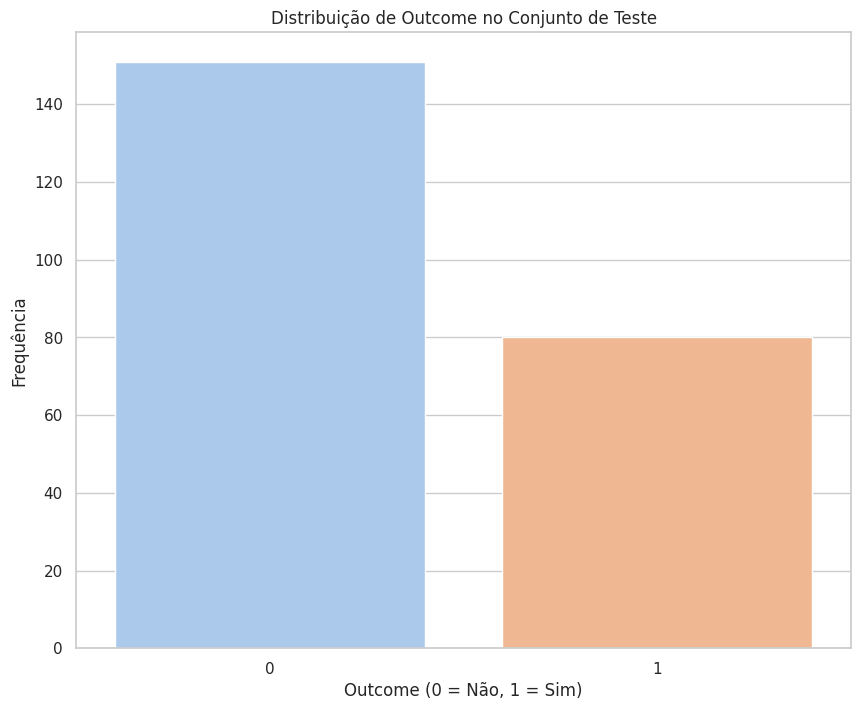

In [78]:
# Distribuição de classes no conjunto de teste
sns.countplot(x=y_test, palette="pastel")
plt.title("Distribuição de Outcome no Conjunto de Teste")
plt.xlabel("Outcome (0 = Não, 1 = Sim)")
plt.ylabel("Frequência")
plt.show()


In [79]:
    pregnancies = float(input("Digite o valor de Pregnancies: "))
    glucose = float(input("Digite o valor de Glucose: "))
    blood_pressure = float(input("Digite o valor de BloodPressure: "))
    skin_thickness = float(input("Digite o valor de SkinThickness: "))
    insulin = float(input("Digite o valor de Insulin: "))
    bmi = float(input("Digite o valor de BMI: "))
    diabetes_pedigree_function = float(input("Digite o valor de DiabetesPedigreeFunction: "))
    age = float(input("Digite o valor de Age: "))

    # Criar o vetor de entrada com esses valores (os valores devem estar na ordem correta)
    entrada = [[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age]]

    # Normalizar a entrada (para ficar no mesmo padrão das variáveis de treino)
    entrada_normalizada = scaler.transform(entrada)

    # Fazer a previsão
    previsao = knn.predict(entrada_normalizada)

    # Mostrar o resultado
    if previsao == 0:
        print("A previsão é: Não tem diabetes.")
    else:
        print("A previsão é: Tem diabetes.")

KeyboardInterrupt: Interrupted by user